In [1]:
"""📦 Install required dependencies"""
!pip install -q tensorflow matplotlib


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


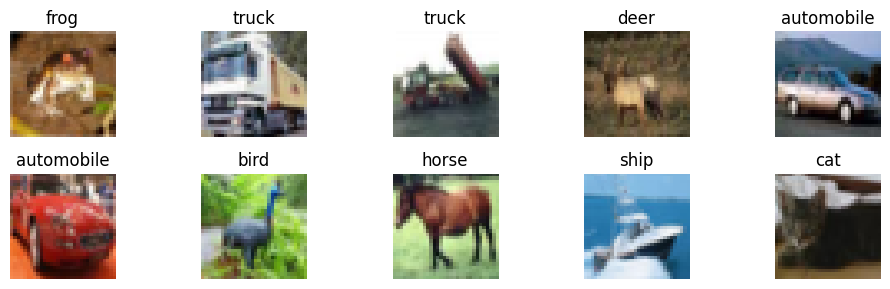

In [2]:
"""📥 Load CIFAR-10 and visualize sample images"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Visualize samples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].astype("uint8"))
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [3]:
"""🔄 Preprocess CIFAR-10: resize to 224x224 and normalize"""

def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [4]:
"""⚙️ Load EfficientNetB0 as feature extractor"""
from tensorflow.keras import layers

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling="avg"
)
base_model.trainable = False  # freeze initially

model = tf.keras.Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
"""🚀 Train feature extractor model"""
history = model.fit(train_ds, validation_data=test_ds, epochs=3)


Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2368s 2s/step - accuracy: 0.0987 - loss: 2.3113 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2302s 1s/step - accuracy: 0.0945 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2301s 1s/step - accuracy: 0.0959 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026


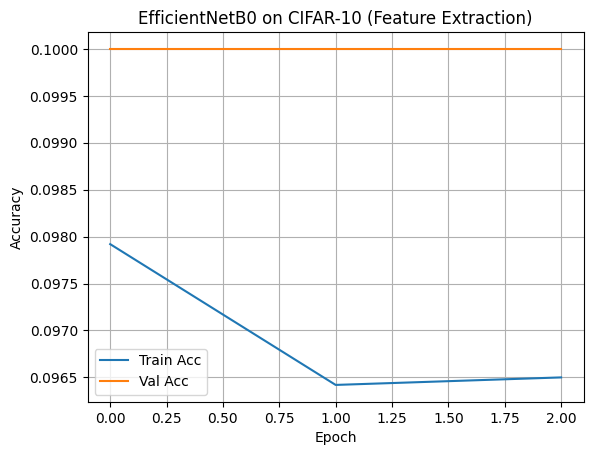

In [6]:
"""📊 Plot training and validation accuracy (Feature Extraction)"""
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("EfficientNetB0 on CIFAR-10 (Feature Extraction)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
